#**Aula 1 - Tratando os Dados**

In [1]:
import pandas as pd

In [2]:
cadastrados = pd.read_csv('https://github.com/alura-tech/alura-tech-pos-data-science-credit-scoring-streamlit/blob/main/dados/clientes_cadastrados.csv?raw=True')

In [3]:
cadastrados.head()

,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0
3,5008808,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0
4,5008809,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0


In [4]:
cadastrados.shape

(438557, 18)

In [5]:
# checa dados duplicados
cadastrados['ID_Cliente'].value_counts()

ID_Cliente
7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: count, Length: 438510, dtype: int64

In [6]:
cadastrados.duplicated().sum()

0

In [7]:
cadastrados['ID_Cliente'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
438552    False
438553    False
438554    False
438555    False
438556    False
Name: ID_Cliente, Length: 438557, dtype: bool

In [8]:
cadastrados[cadastrados['ID_Cliente'].duplicated(keep=False)].shape

(94, 18)

In [9]:
id_repetidos = cadastrados[cadastrados['ID_Cliente'].duplicated(keep=False)]['ID_Cliente']

In [10]:
df_cadastrados_limpo = cadastrados.drop(id_repetidos.index)

In [11]:
df_cadastrados_limpo.head()

,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0
3,5008808,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0
4,5008809,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0


In [12]:
df_cadastrados_limpo['ID_Cliente'].value_counts()

ID_Cliente
5008804    1
6147691    1
6147689    1
6147688    1
6147685    1
          ..
6093492    1
5690720    1
6538938    1
6538937    1
6842885    1
Name: count, Length: 438463, dtype: int64

In [13]:
df_cadastrados_limpo.isnull().sum()

ID_Cliente                    0
Genero                        0
Tem_carro                     0
Tem_casa_propria              0
Qtd_filhos                    0
Rendimento_anual              0
Categoria_de_renda            0
Grau_escolaridade             0
Estado_civil                  0
Moradia                       0
Idade                         0
Anos_empregado                0
Tem_celular                   0
Tem_telefone_trabalho         0
Tem_telefone_fixo             0
Tem_email                     0
Ocupacao                 134177
Tamanho_familia               0
dtype: int64

In [14]:
df_cadastrados_limpo['Ocupacao'].unique()

array([nan, 'Segurança', 'Vendas', 'Contabilidade', 'Construção Civil',
       'Gerência', 'Motorista', 'Equipe principal', 'Alta tecnologia',
       'Limpeza', 'Serviço privado', 'Cozinha', 'Baixa qualificação',
       'Medicina', 'Secretariado', 'Garçom', 'RH', 'Corretor imobiliário',
       'TI'], dtype=object)

In [15]:
df_cadastrados_limpo['Ocupacao'].fillna(value='Outro', inplace=True)

In [16]:
df_cadastrados_limpo.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_carro                0
Tem_casa_propria         0
Qtd_filhos               0
Rendimento_anual         0
Categoria_de_renda       0
Grau_escolaridade        0
Estado_civil             0
Moradia                  0
Idade                    0
Anos_empregado           0
Tem_celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_familia          0
dtype: int64

In [17]:
df_cadastrados_limpo.nunique()

ID_Cliente               438463
Genero                        2
Tem_carro                     2
Tem_casa_propria              2
Qtd_filhos                   12
Rendimento_anual            866
Categoria_de_renda            5
Grau_escolaridade             5
Estado_civil                  5
Moradia                       6
Idade                     16379
Anos_empregado             9406
Tem_celular                   1
Tem_telefone_trabalho         2
Tem_telefone_fixo             2
Tem_email                     2
Ocupacao                     19
Tamanho_familia              13
dtype: int64

In [18]:
df_cadastrados_limpo.drop('Genero', axis=1, inplace=True)

In [19]:
df_cadastrados_limpo.drop('Tem_celular', axis=1, inplace=True)

In [20]:
df_cadastrados_limpo['Tem_carro'].unique()

array(['Y', 'N'], dtype=object)

In [21]:
df_cadastrados_limpo['Tem_casa_propria'].unique()

array(['Y', 'N'], dtype=object)

In [22]:
df_cadastrados_limpo['Tem_telefone_trabalho'].unique()

array([1, 0], dtype=int64)

In [23]:
df_cadastrados_limpo['Tem_telefone_fixo'].unique()

array([0, 1], dtype=int64)

In [24]:
df_cadastrados_limpo['Tem_email'].unique()

array([0, 1], dtype=int64)

In [25]:
df_cadastrados_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Tem_carro              438463 non-null  object 
 2   Tem_casa_propria       438463 non-null  object 
 3   Qtd_filhos             438463 non-null  int64  
 4   Rendimento_anual       438463 non-null  float64
 5   Categoria_de_renda     438463 non-null  object 
 6   Grau_escolaridade      438463 non-null  object 
 7   Estado_civil           438463 non-null  object 
 8   Moradia                438463 non-null  object 
 9   Idade                  438463 non-null  int64  
 10  Anos_empregado         438463 non-null  int64  
 11  Tem_telefone_trabalho  438463 non-null  int64  
 12  Tem_telefone_fixo      438463 non-null  int64  
 13  Tem_email              438463 non-null  int64  
 14  Ocupacao               438463 non-null  o

In [26]:
df_cadastrados_limpo['Tem_carro'] = df_cadastrados_limpo['Tem_carro'].replace(['Y','N'],[1,0])
df_cadastrados_limpo['Tem_casa_propria'] = df_cadastrados_limpo['Tem_casa_propria'].replace(['Y','N'],[1,0])

In [27]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outro,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outro,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,0,0,0,Segurança,2.0
3,5008808,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,0,1,1,Vendas,1.0
4,5008809,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,0,1,1,Vendas,1.0


In [28]:
# Tratamento da feature Idade
df_cadastrados_limpo['Idade']=-df_cadastrados_limpo['Idade']/365.2425

In [29]:
df_cadastrados_limpo['Anos_empregado'].value_counts()

Anos_empregado
 365243    75314
-218         262
-1678        251
-249         241
-978         240
           ...  
-13529         1
-10223         1
-8917          1
-11429         1
-8105          1
Name: count, Length: 9406, dtype: int64

In [30]:
# Tratamento da feature anos empregado
df_cadastrados_limpo['Anos_empregado']=-df_cadastrados_limpo['Anos_empregado']/365.2425

In [31]:
df_cadastrados_limpo['Anos_empregado'].value_counts()

Anos_empregado
-1000.001369    75314
 0.596864         262
 4.594208         251
 0.681739         241
 2.677673         240
                ...  
 37.041144          1
 27.989623          1
 24.413917          1
 31.291539          1
 22.190736          1
Name: count, Length: 9406, dtype: int64

In [32]:
df_cadastrados_limpo.loc[df_cadastrados_limpo['Anos_empregado']<0,'Anos_empregado']=0

In [33]:
df_cadastrados_limpo['Anos_empregado'].value_counts()

Anos_empregado
0.000000     75314
0.596864       262
4.594208       251
0.681739       241
2.677673       240
             ...  
37.041144        1
27.989623        1
24.413917        1
31.291539        1
22.190736        1
Name: count, Length: 9406, dtype: int64

In [34]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,58.793815,3.104787,0,0,0,Segurança,2.0
3,5008808,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0
4,5008809,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

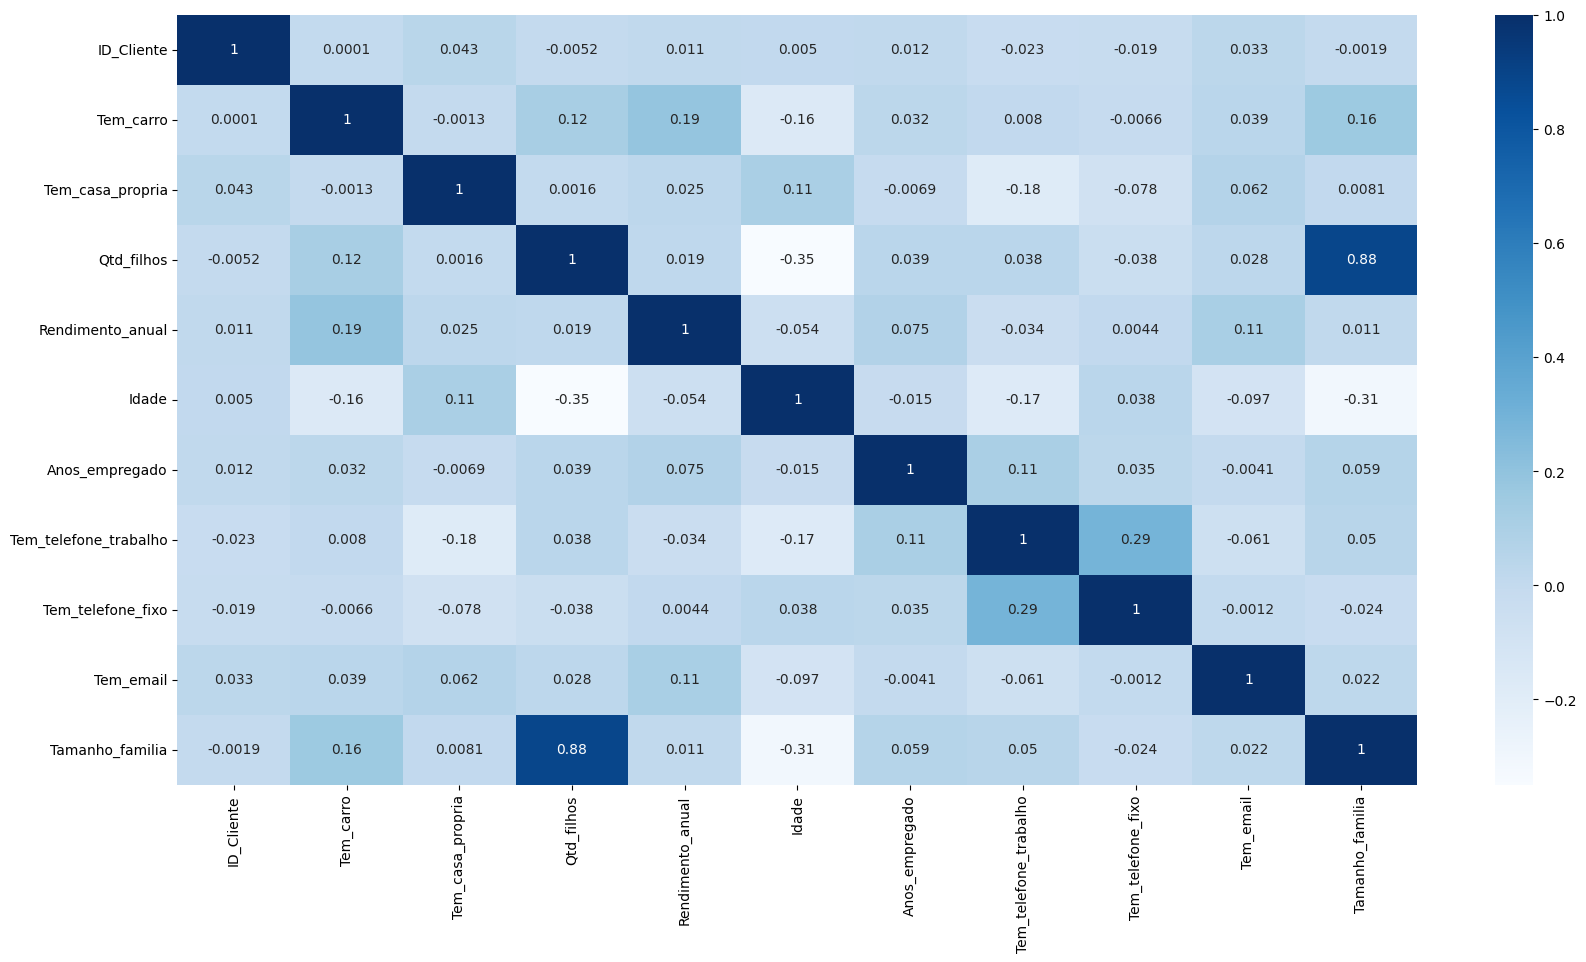

In [36]:
# calcula correlação
dados_numericos = df_cadastrados_limpo.select_dtypes(include=[int, float])
corr = dados_numericos.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap="Blues", annot=True)

In [37]:
df_cadastrados_limpo.drop(['Qtd_filhos'], axis=1, inplace=True)

In [38]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
1,5008805,1,1,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
2,5008806,1,1,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,58.793815,3.104787,0,0,0,Segurança,2.0
3,5008808,0,1,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0
4,5008809,0,1,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0


In [39]:
df_cadastrados_limpo=df_cadastrados_limpo[['ID_Cliente', 'Tem_carro', 'Tem_casa_propria', 
                                           'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
                                           'Tamanho_familia', 'Rendimento_anual', 'Idade', 'Anos_empregado',
                                           'Categoria_de_renda', 'Grau_escolaridade', 'Estado_civil',
                                           'Moradia', 'Ocupacao']]

In [40]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao
0,5008804,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
1,5008805,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
2,5008806,1,1,0,0,0,2.0,112500.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança
3,5008808,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas
4,5008809,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas


In [41]:
colunas_quantitativas = ['Tamanho_familia', 'Rendimento_anual', 'Idade', 'Anos_empregado']

In [42]:
df_cadastrados_limpo[colunas_quantitativas].describe()

,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado
count,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,2.194461,1.875220e+05,43.800857,5.948371
std,0.897194,1.100832e+05,11.458262,6.564112
min,1.000000,2.610000e+04,20.504186,0.000000
25%,2.000000,1.215000e+05,34.262168,1.015763
50%,2.000000,1.611000e+05,42.793487,4.019247
75%,3.000000,2.250000e+05,53.345380,8.495725
max,20.000000,6.750000e+06,68.997994,47.998248


In [43]:
df_cadastrados_limpo['Categoria_de_renda'].value_counts(normalize = True) * 100

Categoria_de_renda
Empregado              51.557144
Associado comercial    22.972520
Pensionista            17.214223
Servidor público        8.252236
Estudante               0.003877
Name: proportion, dtype: float64

In [44]:
df_cadastrados_limpo['Grau_escolaridade'].value_counts(normalize = True) * 100

Grau_escolaridade
Ensino médio                  68.821314
Ensino superior               26.797928
Ensino superior incompleto     3.385690
Ensino fundamental             0.923909
Pós-graduação                  0.071158
Name: proportion, dtype: float64

In [45]:
df_cadastrados_limpo['Estado_civil'].value_counts(normalize = True) * 100

Estado_civil
Casado           68.367912
Solteiro         12.601976
União-estável     8.329323
Divorciado        6.214663
Viúvo             4.486125
Name: proportion, dtype: float64

In [46]:
df_cadastrados_limpo['Moradia'].value_counts(normalize = True) * 100

Moradia
Casa/apartamento próprio    89.801876
Mora com os pais             4.349740
Habitação pública            3.241094
Apartamento alugado          1.362259
Apartamento comercial        0.894032
Cooperativa habitacional     0.350999
Name: proportion, dtype: float64

In [47]:
df_cadastrados_limpo['Ocupacao'].value_counts(normalize = True) * 100

Ocupacao
Outro                   30.601670
Construção Civil        17.840730
Equipe principal         9.805388
Vendas                   9.371828
Gerência                 8.091219
Motorista                5.949191
Alta tecnologia          3.941724
Contabilidade            3.644549
Medicina                 3.083042
Cozinha                  1.841432
Segurança                1.822959
Limpeza                  1.332610
Serviço privado          0.787980
Baixa qualificação       0.488069
Secretariado             0.466174
Garçom                   0.379736
Corretor imobiliário     0.237420
RH                       0.176526
TI                       0.137754
Name: proportion, dtype: float64

In [48]:
import matplotlib as mpl

In [49]:
#Configurações dos gráficos:
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)

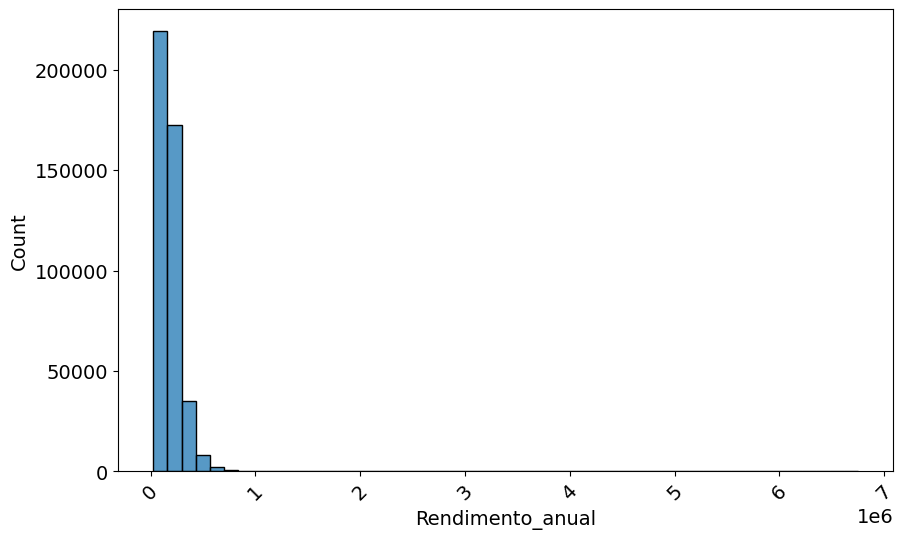

In [50]:
sns.histplot(data=df_cadastrados_limpo, x='Rendimento_anual', bins=50) 
plt.xticks(rotation=45)
plt.show()

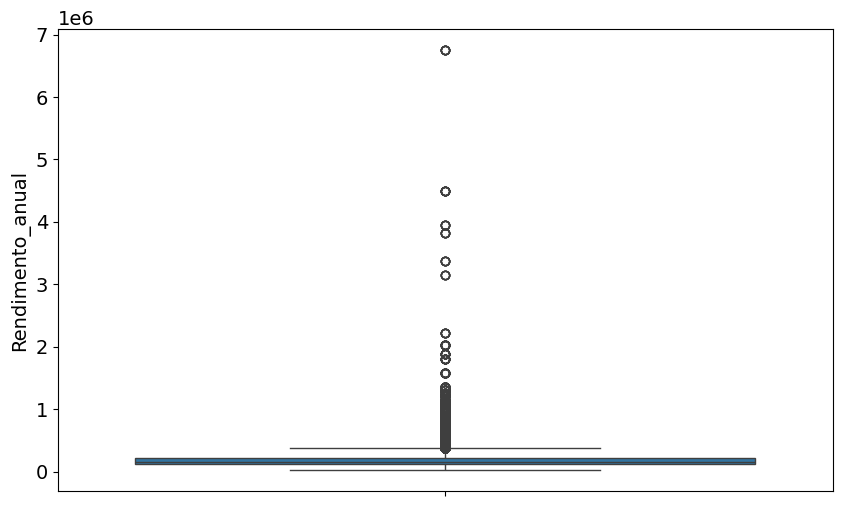

In [51]:
sns.boxplot(data=df_cadastrados_limpo, y='Rendimento_anual') 
plt.xticks(rotation=45)
plt.show()

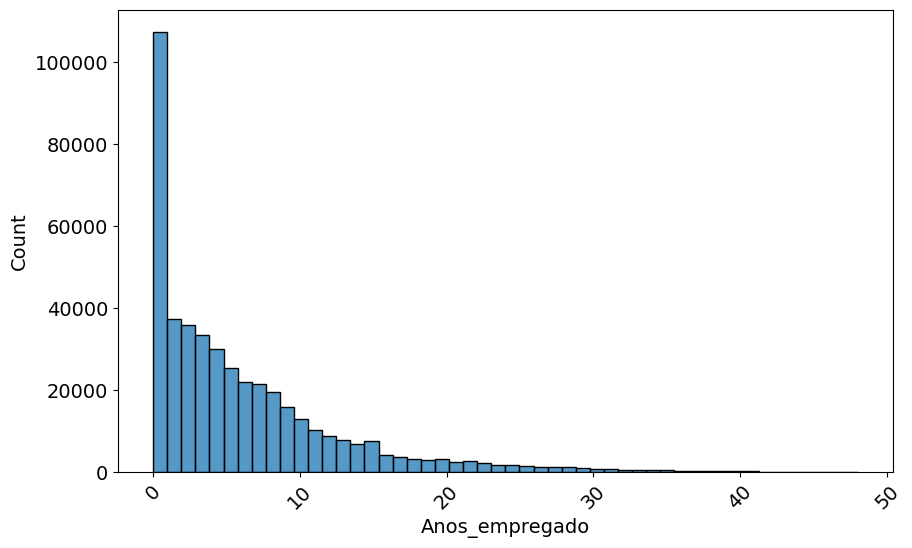

In [52]:
sns.histplot(data=df_cadastrados_limpo, x='Anos_empregado', bins=50) 
plt.xticks(rotation=45)
plt.show()

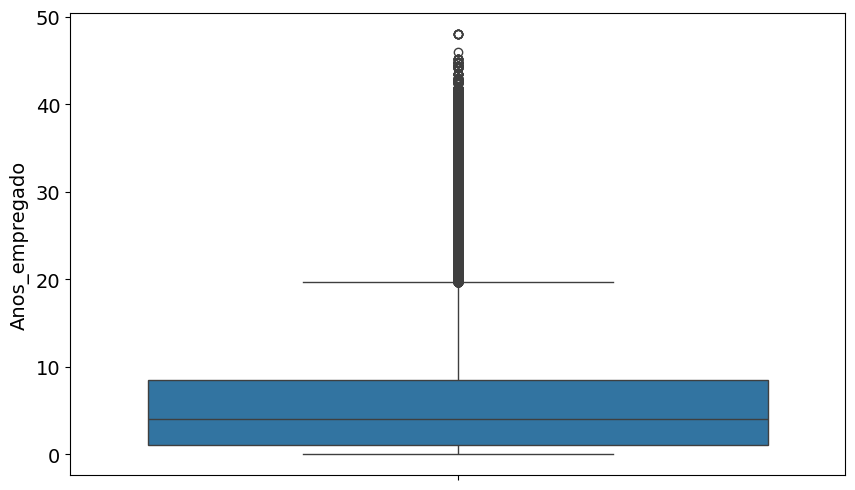

In [53]:
sns.boxplot(data=df_cadastrados_limpo, y='Anos_empregado') 
plt.xticks(rotation=45)
plt.show()

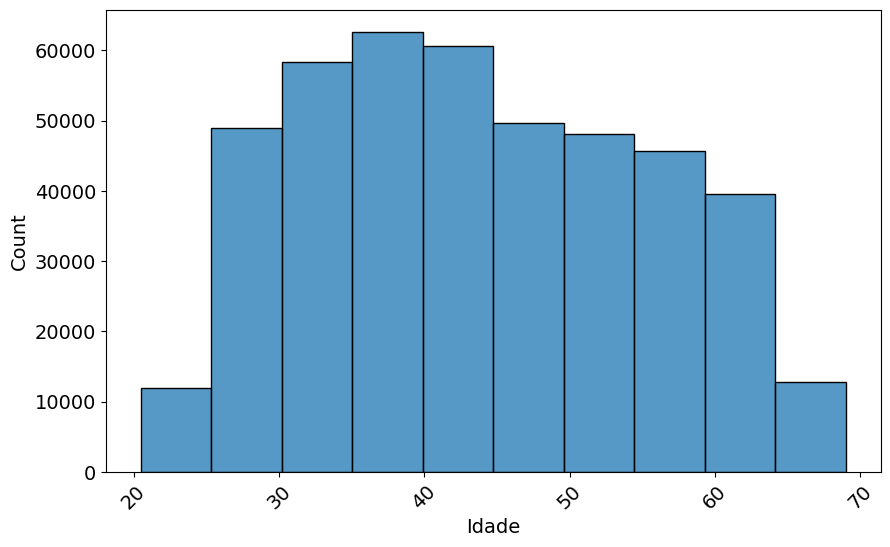

In [54]:
sns.histplot(data=df_cadastrados_limpo, x='Idade', bins=10) 
plt.xticks(rotation=45)
plt.show()

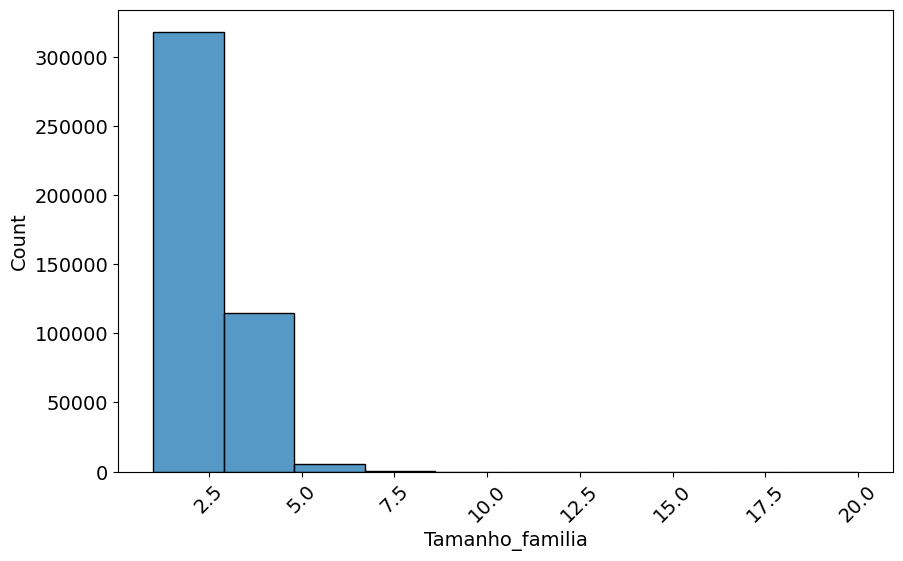

In [55]:
sns.histplot(data=df_cadastrados_limpo, x='Tamanho_familia', bins=10) 
plt.xticks(rotation=45)
plt.show()

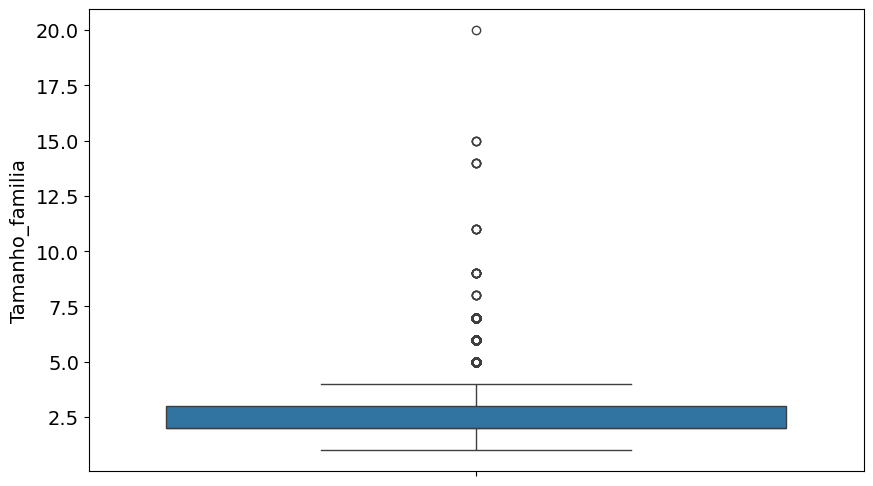

In [56]:
sns.boxplot(data=df_cadastrados_limpo, y='Tamanho_familia') 
plt.xticks(rotation=45)
plt.show()

In [57]:
'''Técnica para remoção de outliers a partir de um intervalo de confiança
o valor +- o desvio-padrão'''

coluna = df_cadastrados_limpo['Rendimento_anual']

coluna_med = coluna.mean()
coluna_std = coluna.std()

limite_sup = coluna_med + (2 * coluna_std)
limite_inf = coluna_med - (2 * coluna_std)

index_outliers = []

for index, valor in coluna.items(): 
  if valor > limite_sup or valor < limite_inf:
    index_outliers.append(index)

len(index_outliers)

12641

In [58]:
df_clientes_cadastrados_sem_outliers = df_cadastrados_limpo.drop(index_outliers)
df_clientes_cadastrados_sem_outliers.shape

(425822, 15)

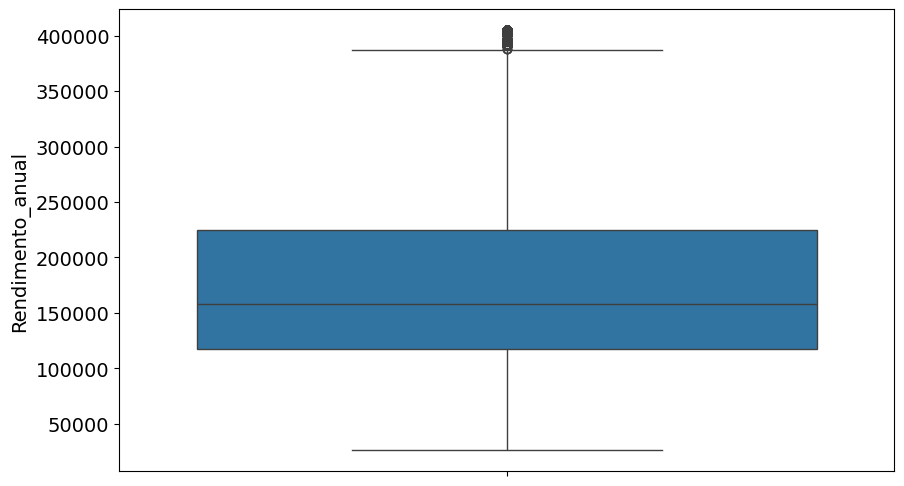

In [59]:
sns.boxplot(data=df_clientes_cadastrados_sem_outliers, y='Rendimento_anual') 
plt.xticks(rotation=45)
plt.show()

In [60]:
df_clientes_cadastrados_sem_outliers['Rendimento_anual'].max

<bound method Series.max of 2         112500.0
3         270000.0
4         270000.0
5         270000.0
6         270000.0
            ...   
438552    135000.0
438553    103500.0
438554     54000.0
438555     72000.0
438556    121500.0
Name: Rendimento_anual, Length: 425822, dtype: float64>

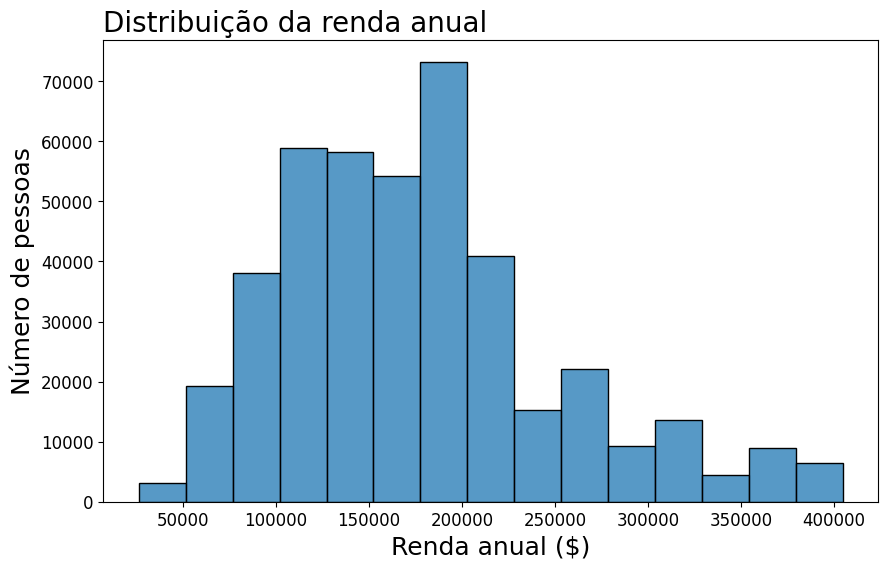

In [61]:
fig = plt.figure(figsize=(10,6))
ax = sns.histplot(data=df_clientes_cadastrados_sem_outliers, x='Rendimento_anual', bins=15)
plt.xticks(rotation=360)
ax.set_title('Distribuição da renda anual', fontsize = 20, loc='left')
ax.set_ylabel('Número de pessoas', fontsize = 18)
ax.set_xlabel('Renda anual ($)', fontsize = 18)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
plt.show()

In [62]:
df_clientes_cadastrados_tratamento1 = df_clientes_cadastrados_sem_outliers
df_clientes_cadastrados_tratamento1.shape

(425822, 15)

#**Aula 2 - Criando a variável Target**

In [63]:
aprovados = pd.read_csv('https://github.com/alura-tech/alura-tech-pos-data-science-credit-scoring-streamlit/blob/main/dados/clientes_aprovados.csv?raw=True')

In [64]:
aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [65]:
aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [66]:
aprovados.query('ID_Cliente == 5001712') #olhando um dos clientes, para ver como isso está organizado

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [67]:
aprovados.query('ID_Cliente == 5001711') #analisando outro ID

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


In [68]:
aprovados.Faixa_atraso.value_counts()

Faixa_atraso
pagamento realizado    442031
1-29 dias              383120
nenhum empréstimo      209230
30-59 dias              11090
>150 dias                1693
60-89 dias                868
90-119 dias               320
120-149 dias              223
Name: count, dtype: int64

In [69]:
df_registros_creditos_agrupados_ID = aprovados.groupby('ID_Cliente')
ser_abertura = df_registros_creditos_agrupados_ID.apply(lambda x: min(x['Mes_referencia']))
ser_abertura.name = 'Abertura'
ser_abertura

ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Abertura, Length: 45985, dtype: int64

In [70]:
df_clientes_aprovados = aprovados.merge(ser_abertura, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [71]:
ser_final = df_registros_creditos_agrupados_ID.apply(lambda x: max(x['Mes_referencia']))
ser_final.name = 'Final'
ser_final

ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Final, Length: 45985, dtype: int64

In [72]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_final, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [73]:
df_clientes_aprovados['Janela'] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


In [74]:
# MOB (month on book - tempo em meses que o cliente está com o crédito)
df_clientes_aprovados['MOB'] = df_clientes_aprovados['Mes_referencia'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


In [75]:
df_clientes_aprovados['Faixa_atraso'].unique()

array(['nenhum empréstimo', '1-29 dias', 'pagamento realizado',
       '30-59 dias', '60-89 dias', '90-119 dias', '120-149 dias',
       '>150 dias'], dtype=object)

In [76]:
dict_faixa_atraso_ind ={'nenhum empréstimo': 0, 'pagamento realizado': 1,
                        '1-29 dias': 2, '30-59 dias': 3, '60-89 dias': 4,
                        '90-119 dias': 5, '120-149 dias': 6, '>150 dias': 7}

In [77]:
df_clientes_aprovados['Ind_Faixa_atraso'] = df_clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


In [78]:
df_clientes_aprovados['Mau'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] > 3 else 0, axis=1)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


In [79]:
df_registros_creditos_ID = df_clientes_aprovados[['ID_Cliente','Abertura', 'Final', 'Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)
df_registros_creditos_ID

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


In [80]:
df_denominador = df_registros_creditos_ID.groupby('Abertura').apply(lambda X: X['ID_Cliente'].count()).reset_index()
df_denominador.columns = ['Abertura','Qtd_Clientes']
df_denominador

,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [81]:
df_vintage = df_clientes_aprovados.groupby(['Abertura','MOB']).apply(lambda X: X['ID_Cliente'].count()).reset_index()
df_vintage.columns = ['Abertura','MOB','Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [82]:
df_vintage = pd.merge(df_vintage[['Abertura','MOB']], df_denominador, on = ['Abertura'], how = 'left')
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


In [83]:
import numpy as np

In [84]:
df_vintage['Qtd_Mau'] = np.nan

for j in range(-60,1):
    ls = []
    for i in range(0,61):
        due = list(df_clientes_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente'])
        ls.extend(due)
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len(set(ls))
        
df_vintage['Taxa_de_Mau']  = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']
df_vintage      

,Abertura,MOB,Qtd_Clientes,Qtd_Mau,Taxa_de_Mau
0,-60,0,415,0.0,0.000000
1,-60,1,415,0.0,0.000000
2,-60,2,415,0.0,0.000000
3,-60,3,415,0.0,0.000000
4,-60,4,415,0.0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,1.0,0.001297
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


In [85]:
df_vintage_pivot = df_vintage.pivot(index = 'Abertura',
                             columns = 'MOB',
                             values = 'Taxa_de_Mau')

df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


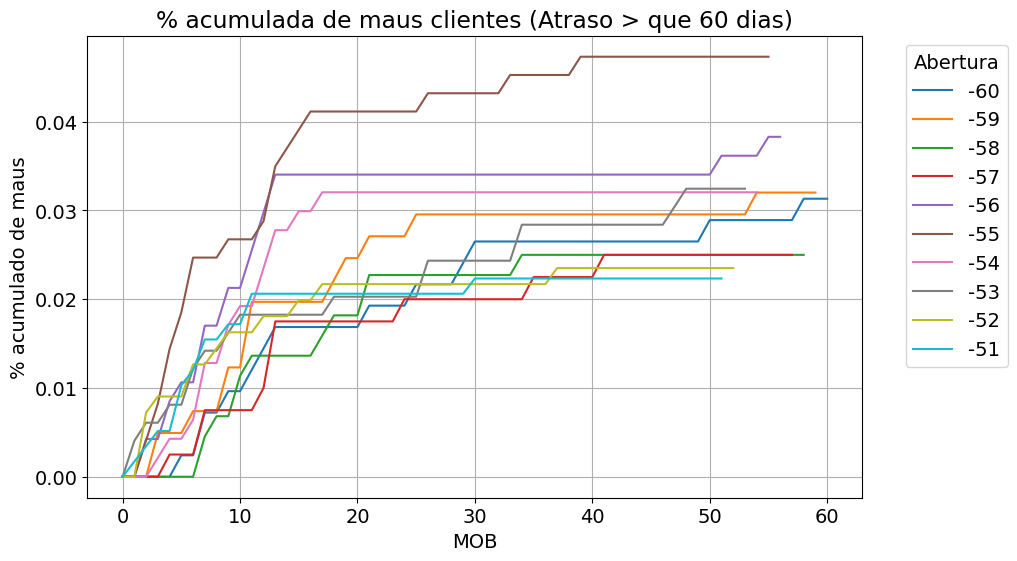

In [86]:
lst = [i for i in range(0,61)]
df_vintage_pivot[lst].T.iloc[:,:10].plot(legend = True, grid = True, title = '% acumulada de maus clientes (Atraso > que 60 dias)')

plt.xlabel('MOB')
plt.ylabel('% acumulado de maus')
plt.legend(bbox_to_anchor=(1.2, 1), title='Abertura')
plt.show()

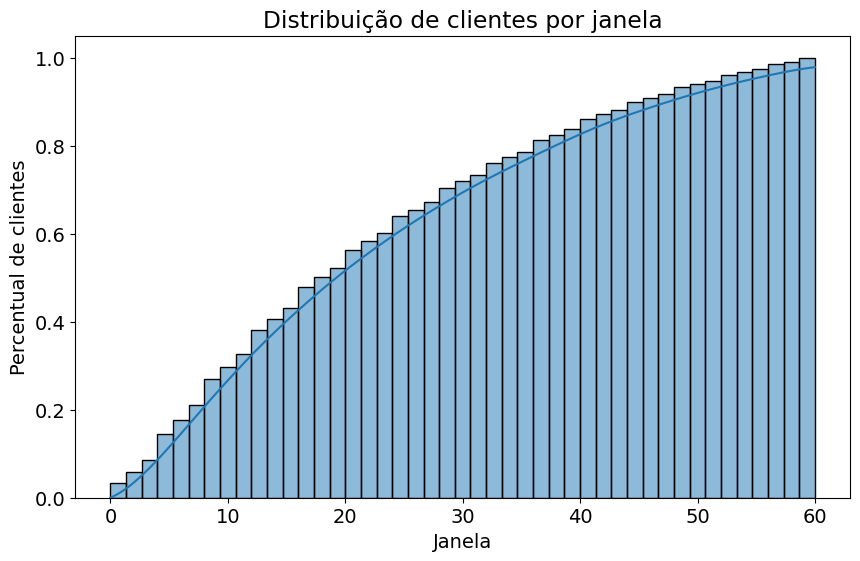

In [87]:
sns.histplot(data=df_registros_creditos_ID, x='Janela', cumulative=True, stat='density', kde=True)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')
plt.show()

In [88]:
dict_intervalo_atraso = {'maior_30_dias': 3, 'maior_60_dias': 4, 'maior_90_dias': 5,
                        'maior_120_dias': 6, 'maior_150_dias': 7}

In [89]:
for chave, valor in dict_intervalo_atraso.items():
  df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= valor else 0, axis=1) # mais de 60
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


In [90]:
dict_taxa_mau = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = []
  for i in range(0,61):
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) #cumsum
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


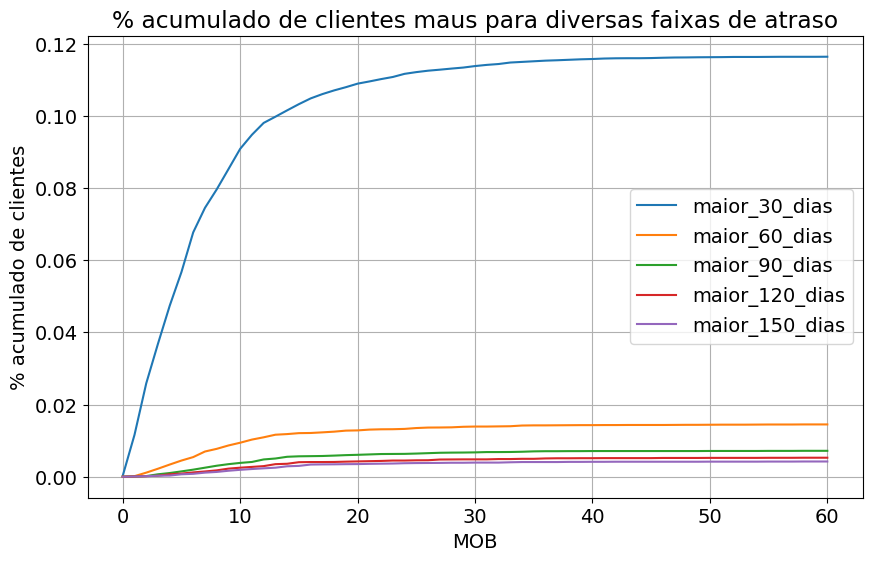

In [91]:
df_taxa_mau.plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

In [92]:
len(df_clientes_aprovados.query('Janela >= 12').groupby('ID_Cliente').count().index)

30918

In [93]:
df_clientes_aprovados_tratamento1 = df_clientes_aprovados.query('Janela >= 12').copy()
df_clientes_aprovados_tratamento1.shape

(943061, 14)

In [94]:
def verifica(registros):
  lista_status = registros['Faixa_atraso'].to_list()
  if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
    return 1
  else:
    return 0
  
df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_id.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [95]:
df_registros_creditos_id.shape

(30918, 2)

In [96]:
df_registro_clientes_targets = df_clientes_cadastrados_tratamento1.merge(df_registros_creditos_id, on='ID_Cliente')
df_registro_clientes_targets.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao,Mau
0,5008806,1,1,0,0,0,2.0,112500.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança,0
1,5008810,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas,0
2,5008811,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas,0
3,5008812,0,1,0,0,0,1.0,283500.0,61.504343,0.000000,Pensionista,Ensino superior,Divorciado,Casa/apartamento próprio,Outro,0
4,5008813,0,1,0,0,0,1.0,283500.0,61.504343,0.000000,Pensionista,Ensino superior,Divorciado,Casa/apartamento próprio,Outro,0


In [97]:
df_registro_clientes_targets['Mau'].value_counts(normalize=True)*100

Mau
0    97.726673
1     2.273327
Name: proportion, dtype: float64

#**Aula 3 - Machine Learning: Construindo a Pipeline**



In [98]:
df = df_registro_clientes_targets

In [99]:
df.to_csv('df_clean.csv', index=False)

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
SEED = 1561651

In [102]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=SEED)

In [103]:
train_df.shape

(18193, 16)

In [104]:
test_df.shape

(4549, 16)

In [105]:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

In [106]:
train_df.to_csv('train.csv',index=False)

In [107]:
train_df.to_csv('test.csv',index=False)

In [108]:
train_df.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao,Mau
3806,5029272,1,1,1,1,0,2.0,116653.5,25.380398,4.547664,Associado comercial,Ensino médio,Casado,Casa/apartamento próprio,Construção Civil,0
17766,5116598,0,0,0,1,0,2.0,144000.0,61.994428,0.000000,Pensionista,Ensino médio,Casado,Casa/apartamento próprio,Outro,0
16516,5112969,0,0,1,1,0,2.0,112500.0,50.790913,14.100221,Empregado,Ensino médio,União-estável,Casa/apartamento próprio,Construção Civil,0
1286,5021463,1,0,0,0,0,3.0,225000.0,31.488668,2.012362,Empregado,Ensino superior,União-estável,Casa/apartamento próprio,Equipe principal,0
17868,5116780,1,1,1,0,0,2.0,211500.0,36.761877,14.338419,Associado comercial,Ensino médio,Casado,Casa/apartamento próprio,Outro,0


In [109]:
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
# %pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [110]:
class DropFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,feature_to_drop = ['ID_Cliente']):
        self.feature_to_drop = feature_to_drop
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feature_to_drop).issubset(df.columns)):
            df.drop(self.feature_to_drop,axis=1,inplace=True)
            return df
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [111]:
class MinMax(BaseEstimator,TransformerMixin):
    def __init__(self,min_max_scaler  = ['Idade', 'Rendimento_anual', 'Tamanho_familia', 'Anos_empregado']):
        self.min_max_scaler = min_max_scaler 
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.min_max_scaler ).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler] = min_max_enc.fit_transform(df[self.min_max_scaler ])
            return df
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [112]:
class OneHotEncodingNames(BaseEstimator,TransformerMixin):
    def __init__(self,OneHotEncoding = ['Categoria_de_renda','Estado_civil', 'Moradia', 
                                        'Ocupacao']):                                      
                                                                               
        self.OneHotEncoding = OneHotEncoding

    def fit(self,df):
        return self

    def transform(self,df):
        if (set(self.OneHotEncoding).issubset(df.columns)):
            # função para one-hot-encoding das features
            def one_hot_enc(df,OneHotEncoding):
                one_hot_enc = OneHotEncoder()
                one_hot_enc.fit(df[OneHotEncoding])
                # obtendo o resultado dos nomes das colunas
                feature_names = one_hot_enc.get_feature_names_out(OneHotEncoding)
                # mudando o array do one hot encoding para um dataframe com os nomes das colunas
                df = pd.DataFrame(one_hot_enc.transform(df[self.OneHotEncoding]).toarray(),
                                  columns= feature_names,index=df.index)
                return df

            # função para concatenar as features com aquelas que não passaram pelo one-hot-encoding
            def concat_with_rest(df,one_hot_enc_df,OneHotEncoding):              
                # get the rest of the features
                outras_features = [feature for feature in df.columns if feature not in OneHotEncoding]
                # concaternar o restante das features com as features que passaram pelo one-hot-encoding
                df_concat = pd.concat([one_hot_enc_df, df[outras_features]],axis=1)
                return df_concat

            # one hot encoded dataframe
            df_OneHotEncoding = one_hot_enc(df,self.OneHotEncoding)

            # retorna o dataframe concatenado
            df_full = concat_with_rest(df, df_OneHotEncoding,self.OneHotEncoding)
            return df_full

        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [113]:
class OrdinalFeature(BaseEstimator,TransformerMixin):
    def __init__(self,ordinal_feature = ['Grau_escolaridade']):
        self.ordinal_feature = ordinal_feature
    def fit(self,df):
        return self
    def transform(self,df):
        if 'Grau_escolaridade' in df.columns:
            ordinal_encoder = OrdinalEncoder()
            df[self.ordinal_feature] = ordinal_encoder.fit_transform(df[self.ordinal_feature])
            return df
        else:
            print("Grau_escolaridade não está no DataFrame")
            return df

In [114]:
class Oversample(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,df):
        return self
    def transform(self,df):
        if 'Mau' in df.columns:
            # função smote para superamostrar a classe minoritária para corrigir os dados desbalanceados
            oversample = SMOTE(sampling_strategy='minority')
            X_bal, y_bal = oversample.fit_resample(df.loc[:, df.columns != 'Mau'], df['Mau'])
            df_bal = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)
            return df_bal
        else:
            print("O target não está no DataFrame")
            return df

In [115]:
from sklearn.pipeline import Pipeline

In [116]:
def pipeline(df):

    pipeline = Pipeline([
        ('feature_dropper', DropFeatures()),
        ('OneHotEncoding', OneHotEncodingNames()),
        ('ordinal_feature', OrdinalFeature()),
        ('min_max_scaler', MinMax()),
        ('oversample', Oversample())
    ])
    df_pipeline = pipeline.fit_transform(df)
    return df_pipeline

#**Aula 4 - Machine Learning: Escolhendo o Melhor Modelo**


In [117]:
import sklearn
print(sklearn.__version__)

1.5.1


In [118]:
train = pipeline(train_df) # type: ignore

In [119]:
train.head()

,Categoria_de_renda_Associado comercial,Categoria_de_renda_Empregado,Categoria_de_renda_Estudante,Categoria_de_renda_Pensionista,Categoria_de_renda_Servidor público,Estado_civil_Casado,Estado_civil_Divorciado,Estado_civil_Solteiro,Estado_civil_União-estável,Estado_civil_Viúvo,...,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Grau_escolaridade,Mau
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0.071429,0.237179,0.086979,0.105709,1.0,0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0.071429,0.309524,0.855763,0.000000,1.0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,1,0,0.071429,0.226190,0.620523,0.327754,1.0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0.142857,0.523810,0.215234,0.046777,2.0,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0.071429,0.488095,0.325956,0.333291,1.0,0


In [120]:
train['Mau'].value_counts(normalize = True) *100

Mau
0    50.0
1    50.0
Name: proportion, dtype: float64

In [121]:
train.shape

(35544, 46)

In [122]:
X_train, y_train = train.loc[:, train.columns != 'Mau'], train['Mau']

In [123]:
test = pipeline(test_df)

In [124]:
test.head()

,Categoria_de_renda_Associado comercial,Categoria_de_renda_Empregado,Categoria_de_renda_Estudante,Categoria_de_renda_Pensionista,Categoria_de_renda_Servidor público,Estado_civil_Casado,Estado_civil_Divorciado,Estado_civil_Solteiro,Estado_civil_União-estável,Estado_civil_Viúvo,...,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Grau_escolaridade,Mau
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0.000000,0.178571,0.847034,0.000000,2.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,1,1,0,0.071429,0.523810,0.329230,0.338420,1.0,0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0.214286,0.226190,0.372605,0.364600,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0.000000,0.190476,0.800840,0.079114,1.0,0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0.071429,0.226190,0.610251,0.044761,1.0,0


In [125]:
test['Mau'].value_counts(normalize = True) *100

Mau
0    50.0
1    50.0
Name: proportion, dtype: float64

In [126]:
test.shape

(8906, 46)

In [127]:
X_test, y_test= test.loc[:, test.columns != 'Mau'], test['Mau']

In [130]:
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### **Teste KS**

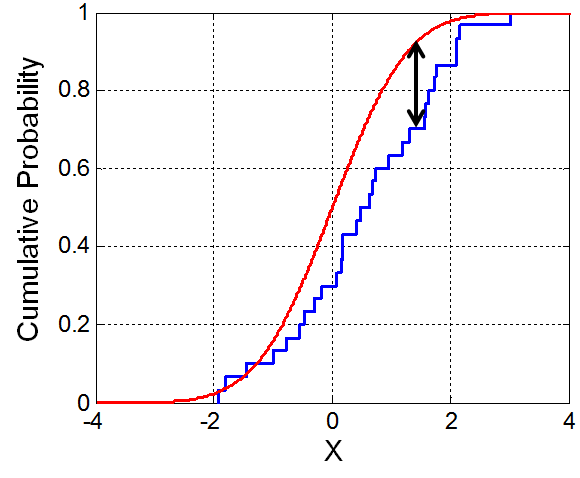

In [182]:
SEED = 1561651

def roda_modelo(modelo):

    # Treinando modelo com os dados de treino
    modelo.fit(X_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(X_test)

    print(f"\n------------------------------Resultados {modelo}------------------------------\n")

    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")
    
    # Separando a probabilidade de ser bom e mau, e calculando o KS
    #métrica KS: probabilidade de um cliente ser classificado como bom ou mau. 
    data_bom = np.sort(modelo.predict_proba(X_test)[:, 0])
    data_mau = np.sort(modelo.predict_proba(X_test)[:, 1])
    kstest = stats.ks_2samp(data_bom, data_mau)

    print(f"Métrica KS: {kstest}")

    print("\nConfusion Matrix\n")
    # Criando matriz de confusão
    fig, ax = plt.subplots(figsize=(7,7))
    matriz_confusao = ConfusionMatrixDisplay(modelo, X_test, y_test, normalize = True,
                                            display_labels=['Bom pagador', 'Mau pagador'],
                                            ax=ax, cmap=plt.cm.Blues)
    ax.set_title("Matriz de Confusão\n Normalizada", fontsize=16, fontweight="bold")
    ax.set_xlabel("Label predita", fontsize=18)
    ax.set_ylabel("Label verdadeira", fontsize=18)
    plt.grid(False)    
    plt.show(matriz_confusao)

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(X_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))


    print("\nRoc Curve\n")
    metrics.plot_roc_curve(modelo, X_test, y_test)


In [183]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()


------------------------------Resultados LogisticRegression()------------------------------

AUC 0.6548049395212889
Métrica KS: KstestResult(statistic=0.0513137210869077, pvalue=1.2964681611225716e-10, statistic_location=0.7416118664803821, statistic_sign=-1)

Confusion Matrix



TypeError: ConfusionMatrixDisplay.__init__() got an unexpected keyword argument 'normalize'

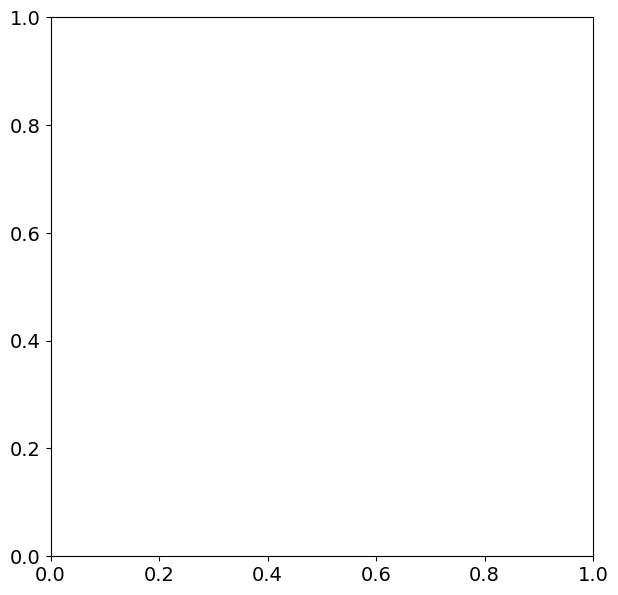

In [184]:
roda_modelo(modelo_logistico)

In [143]:
from sklearn.tree import DecisionTreeClassifier
modelo_tree = DecisionTreeClassifier()


------------------------------Resultados DecisionTreeClassifier()------------------------------

AUC 0.7987697340826859
Métrica KS: KstestResult(statistic=0.35661351897597127, pvalue=0.0, statistic_location=0.3333333333333333, statistic_sign=-1)

Confusion Matrix



TypeError: ConfusionMatrixDisplay.__init__() got an unexpected keyword argument 'ax'

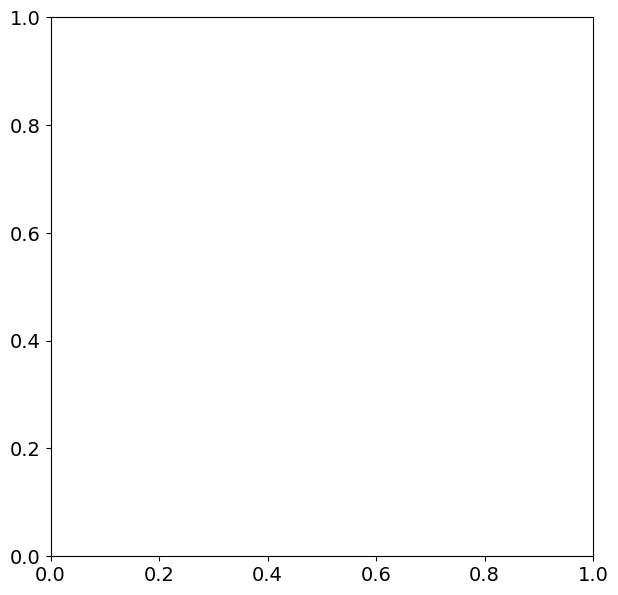

In [144]:
roda_modelo(modelo_tree)

In [145]:
from sklearn.ensemble import RandomForestClassifier
modelo_forest = RandomForestClassifier()


------------------------------Resultados RandomForestClassifier()------------------------------

AUC 0.9712819104382833
Métrica KS: KstestResult(statistic=0.3799685605209971, pvalue=0.0, statistic_location=0.87, statistic_sign=-1)

Confusion Matrix



TypeError: ConfusionMatrixDisplay.__init__() got an unexpected keyword argument 'ax'

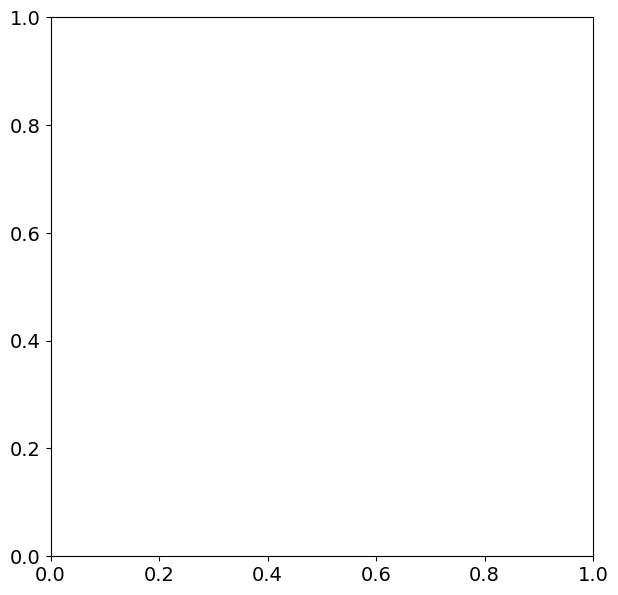

In [146]:
roda_modelo(modelo_forest)

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_xgb = GradientBoostingClassifier()


------------------------------Resultados GradientBoostingClassifier()------------------------------

AUC 0.9601507805984597
Métrica KS: KstestResult(statistic=0.1360880305412082, pvalue=2.820766137464857e-72, statistic_location=0.8502878791874876, statistic_sign=1)

Confusion Matrix



TypeError: ConfusionMatrixDisplay.__init__() got an unexpected keyword argument 'ax'

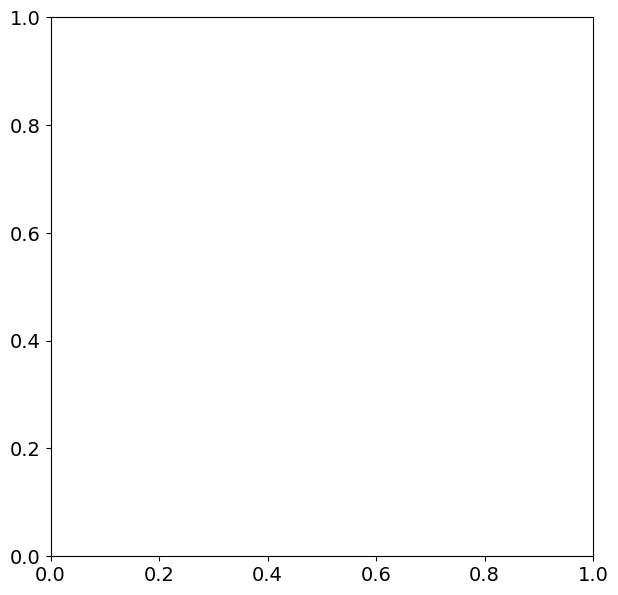

In [148]:
roda_modelo(modelo_xgb)

In [185]:
import joblib 

In [186]:
joblib.dump(modelo_xgb, 'xgb.joblib')

['xgb.joblib']